<a href="https://colab.research.google.com/github/yohangumiel/Data-analysis/blob/main/Ngram_aula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Código desenvvolvido por Yohan B. Gumiel

### Link de acesso ao material: https://github.com/yohangumiel/Data-analysis





## BIBLIOTECAS

In [1]:
!pip install nltk==3.4 # necessária a instalação da versão 3.4 para não ter erro nos n-gramas

     |████████████████████████████████| 1.4 MB 7.3 MB/s 
  Created wheel for nltk: filename=nltk-3.4-py3-none-any.whl size=1436400 sha256=cac51f748ce30145889f3fc8beaf3f8bf88b56272b026612d28fbecabcedc09b
  Stored in directory: /root/.cache/pip/wheels/13/b8/81/2349be11dd144dc7b68ab983b58cd2fae353cdc50bbdeb09d0
Successfully built nltk
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [2]:
import nltk
print('The nltk version is {}.'.format(nltk.__version__))

The nltk version is 3.4.


In [3]:
import os
import glob
import json
import json
import numpy as np
import string
import pandas as pd
import re
from nltk.tokenize import word_tokenize,sent_tokenize
from datetime import datetime
from collections import Counter
from nltk import ngrams
nltk.download('punkt')

pd.set_option('display.max_rows', None) # mostrar todas as linhas do dataframe


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

## DOWNLOAD DO STANZA

## Página do stanza: https://stanfordnlp.github.io/stanza/

In [5]:
!pip install stanza

import stanza
stanza.download('pt')

     |████████████████████████████████| 337 kB 7.7 MB/s 


2021-07-28 23:51:03 INFO: Downloading default packages for language: pt (Portuguese)...


2021-07-28 23:51:41 INFO: Finished downloading models and saved to /root/stanza_resources.


In [6]:
stanza_pt = stanza.Pipeline('pt', tokenize_pretokenized=True, use_gpu= True)

2021-07-28 23:51:41 INFO: Loading these models for language: pt (Portuguese):
| Processor | Package |
-----------------------
| tokenize  | bosque  |
| mwt       | bosque  |
| pos       | bosque  |
| lemma     | bosque  |
| depparse  | bosque  |

2021-07-28 23:51:41 INFO: Use device: gpu
2021-07-28 23:51:41 INFO: Loading: tokenize
2021-07-28 23:51:41 INFO: Loading: mwt
2021-07-28 23:51:53 INFO: Loading: pos
2021-07-28 23:51:53 INFO: Loading: lemma
2021-07-28 23:51:53 INFO: Loading: depparse
2021-07-28 23:51:54 INFO: Done loading processors!


## DOWNLOAD DAS STOPWORDS

In [7]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('portuguese'))
stop_words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


{'a',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'estamos',
 'estas',
 'estava',
 'estavam',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéramos',
 'estivéssemos',
 'estou',
 'está',
 'estávamos',
 'estão',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fui',
 'fôramos',
 'fôssemos',
 'haja',
 'hajam',
 'hajamos',
 'havemos',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houveram',
 'houverei',
 'houverem',
 'houveremos',
 'houveria',
 'houveriam',
 'houvermos',
 'houverá',
 'houverão',
 'houveríamos',
 'houvesse',


## LISTA DE PONTUAÇÕES A SEREM RETIRADAS

In [8]:
remove = string.punctuation
remove

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

## FUNÇÕES/MÉTODOS

In [9]:
def open_xlsx(folder_path):
    paths = glob.glob(folder_path +"/*.xlsx")    
    data = pd.DataFrame()   
    for path in paths:
        df = pd.read_excel(path)
        print('Path: ',path,'\nLen: ',len(df),'\n')
        data = data.append(df)
    data.reset_index(inplace = True)
    return data

def token_preprocess(raw):  
    raw = [token.lower() for token in raw] #
    raw = [''.join(c for c in s if c not in remove) for s in raw]
    raw = [re.sub(r"\d+[.,]?\d*","", s) for s in raw]
    raw = [s for s in raw if s not in stop_words] # stopwords
    raw = [s for s in raw if 'xx' not in s] # xx de de-identificação de número de telefone XXXX-XXXX ou de e-mail xxxxx@xxxx.com
    raw = [s for s in raw if s != 'r'] # caractere r solto no texto (somente ele)
    raw = [s for s in raw if s != 'h'] # caractere h solto no texto (somente ele)
    raw = [' '.join(s.split()) for s in raw if s]
    string = ' '.join(raw)

    return string.rstrip().lstrip()

def text_preprocess(data):

    processed_data = []
    for text in data:
        text = re.sub("(?i)art[.] ","art ", text)  # erros de tokenização devido a Art. ou art. ou ART. referenciando a artigo, (?i) case-insensitive. EXEMPLO: "Art. 35. Se" fica "Art 35. Se" após processamento ["art","Se"] 
        for sentence in sent_tokenize(text, language = 'portuguese'): 
            tokenized_sentence = word_tokenize(sentence, language='portuguese')
            processed_sentence = token_preprocess(tokenized_sentence)
            if processed_sentence != '':
                processed_data.append(processed_sentence)

    return processed_data


def ngram_analysis(data, ngram, most_common):
    
    ngram_counts = [list(ngrams(s.split(), ngram)) for s in data]
    flat_ngram_counts = [item for sublist in ngram_counts for item in sublist]
    ngram_list = Counter(flat_ngram_counts)

    common = ngram_list.most_common(most_common)
    # filename = 'ngram_'+ str(ngram) + '_mostcommon_' + str(most_common) + '_' + datetime.now().strftime("%Y_%m_%d-%I_%M_%S_%p") + '.xlsx'
    # print(filename)

    df_common = pd.DataFrame(common, columns = ['Ngram','Count'])
    # df_common.to_excel(filename,index = True)
    
    
    return df_common


def pos_tagging_analysis(data, most_common):
    verbs = []
    verbs_lemma = []
    nouns = []
    nouns_lemma = []
    
    texts = [s for s in data]    
    for text in texts:
       tokenized_text = word_tokenize(text, language='portuguese')
       if len(tokenized_text) > 0:
           doc =  stanza_pt([tokenized_text])    
           for sent in doc.sentences:
               for word in sent.words:               
                   if word.pos == 'VERB':
                       verbs.append(word.text)
                       verbs_lemma.append(word.lemma)
                   elif word.pos == 'NOUN':
                       nouns.append(word.text)
                       nouns_lemma.append(word.lemma)

    counter_verb = Counter(verbs).most_common(most_common)
    # filename = 'counter_verb_mostcommon_' + str(most_common) + '_' + datetime.now().strftime("%Y_%m_%d-%I_%M_%S_%p") + '.xlsx'
    df_verbs = pd.DataFrame(counter_verb, columns = ['Verb','Count'])    
    # df_verbs.to_excel(filename,index = True)
    
    counter_verb_lemma = Counter(verbs_lemma).most_common(most_common)
    # filename = 'counter_verb_lemma_mostcommon_' + str(most_common) + '_' + datetime.now().strftime("%Y_%m_%d-%I_%M_%S_%p") + '.xlsx'
    df_verbs_lemma = pd.DataFrame(counter_verb_lemma, columns = ['Verb_lemma','Count'])
    # df_verbs_lemma.to_excel(filename,index = True)

    
    counter_noun = Counter(nouns).most_common(most_common)
    # filename = 'counter_noun_mostcommon_' + str(most_common) + '_' + datetime.now().strftime("%Y_%m_%d-%I_%M_%S_%p") + '.xlsx'
    df_nouns = pd.DataFrame(counter_noun, columns = ['Noun','Count'])
    # df_noun.to_excel(filename,index = True)
    
    counter_noun_lemma = Counter(nouns_lemma).most_common(most_common)
    # filename = 'counter_noun_lemma_mostcommon_' + str(most_common) + '_' + datetime.now().strftime("%Y_%m_%d-%I_%M_%S_%p") + '.xlsx'
    df_nouns_lemma = pd.DataFrame(counter_noun_lemma, columns = ['Nouns_lemma','Count'])
    # df_noun_lemma.to_excel(filename,index = True)

                          
    return df_verbs, df_verbs_lemma, df_nouns, df_nouns


def ngram_analysis_first_element(data, first_element_POS, ngram, most_common):
    
    new_data = []
    new_data_lemma = []
    data_concat = []
    data_concat_lemma = []
    for text in data:
        data_concat = []
        data_concat_lemma = []
        if len(text) > 0:        
            doc = stanza_pt([text.split()])              
            for sent in doc.sentences:
                for word in sent.words:
                    concat_word = word.text + '|' + word.pos
                    concat_lemma = word.lemma + '|' + word.pos       
                    data_concat.append(concat_word)
                    data_concat_lemma.append(concat_lemma)
        new_data.append(data_concat)
        new_data_lemma.append(data_concat_lemma)
        
    ngram_counts = [list(ngrams(s,ngram)) for s in new_data]
    ngram_counts_lemma = [list(ngrams(s,ngram)) for s in new_data_lemma]
    
    flat_ngram_counts = [item for sublist in ngram_counts for item in sublist]
    flat_ngram_lemma_counts = [item for sublist in ngram_counts_lemma for item in sublist]
    
    
    flat_ngram_counts_verb = []
    for element in flat_ngram_counts:       
        if first_element_POS in element[0]:
            flat_ngram_counts_verb.append(element)
    
    ngram_list = Counter(flat_ngram_counts_verb)
    common = ngram_list.most_common(most_common)

    
    flat_ngram_counts_lemma_verb = []
    for element in flat_ngram_lemma_counts:       
        if first_element_POS in element[0]:
            flat_ngram_counts_lemma_verb.append(element)
    
    ngram_list = Counter(flat_ngram_counts_verb)
    common = ngram_list.most_common(most_common)
    
    ngram_list_lemma = Counter(flat_ngram_counts_lemma_verb)
    common_lemma = ngram_list_lemma.most_common(most_common)    
    
    
    
    # filename = 'ngram_'+ str(ngram) + '_mostcommon_' + str(most_common) + '_VERB_' + datetime.now().strftime("%Y_%m_%d-%I_%M_%S_%p") + '.xlsx'
    # print(filename)   
    df_first_element = pd.DataFrame(common, columns = ['Ngram','Count'])
    # df_first_element.to_excel(filename,index = True)
    
    
    # filename_lemma = 'ngram_'+ str(ngram) + '_mostcommon_' + str(most_common) + '_VERB_lemma_' + datetime.now().strftime("%Y_%m_%d-%I_%M_%S_%p") + '.xlsx'
    # print(filename_lemma)   
    df_first_element_lemma = pd.DataFrame(common_lemma, columns = ['Ngram','Count'])
    # df_first_element_lemma.to_excel(filename_lemma,index = True)


    return df_first_element, df_first_element_lemma

In [10]:
!git clone https://github.com/yohangumiel/Data-analysis.git


Cloning into 'Data-analysis'...
remote: Enumerating objects: 42, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 42 (delta 15), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (42/42), done.


In [11]:
os.chdir('Data-analysis')

In [12]:
data = open_xlsx('consumidor-gov-br') # pasta consumidor.gov.br no github
data.head(20)

Path:  consumidor-gov-br/relatos_MG_experimento.xlsx 
Len:  10001 



,index,Nome,Data,Estado,Cidade,Relato,Resposta,Status
0,0,Correios,13/04/2021,MG,São João Del Rei,\n\t\t\t\tBoa tarde !\r\n\r\nNo dia 08/04/2021...,"\n\t\t\t\tPrezado Cliente, para que possamos v...",\n\t\t\t\tNão Resolvido
1,1,Samsung,25/04/2021,MG,Belo Horizonte,\n\t\t\t\tFui realizar essa ultima atualização...,"\n\t\t\t\tCaro cliente,\r\n\r\n \r\n\r\nConfor...",\n\t\t\t\tNão Resolvido
2,2,Vivo - Telefônica,14/04/2021,MG,Caratinga,"\n\t\t\t\tAo contatar a empresa, solicitei a 2...",\n\t\t\t\tPrezada Sra. Vitoria\r\n\r\nRealizam...,\n\t\t\t\tNão avaliado pelo consumidor
3,3,Vivo - Telefônica,13/04/2021,MG,Carmópolis de Minas,\n\t\t\t\tFiz uma reclamação anteriormente a r...,\n\t\t\t\tPrezada Sra. Juliana\r\n\r\nRealizam...,\n\t\t\t\tNão avaliado pelo consumidor
4,4,Vivo - Telefônica,14/04/2021,MG,Santa Bárbara do Leste,\n\t\t\t\tSolicitei a Vivo plano para o número...,\n\t\t\t\tContatamos o responsável pela manife...,\n\t\t\t\tNão avaliado pelo consumidor
5,5,Vivo - Telefônica,09/04/2021,MG,Belo Horizonte,\n\t\t\t\tNão param de me ligar para oferecer ...,"\n\t\t\t\tPrezada Sra. Brenda, \r\n\r\nSegue ...",\n\t\t\t\tNão avaliado pelo consumidor
6,6,Ame Digital,11/04/2021,MG,Belo Horizonte,\n\t\t\t\tNo dia 23/03/2020 fiz o pedido númer...,\n\t\t\t\tBom dia Rafael!\r\nComo vai?\r\n\r\n...,\n\t\t\t\tNão avaliado pelo consumidor
7,7,Pernambucanas Cartões,14/04/2021,MG,Uberaba,\n\t\t\t\tProcurado operadora dia 22/02 devido...,"\n\t\t\t\tOlá Lazara, \r\n\r\nRecebemos sua ma...",\n\t\t\t\tNão avaliado pelo consumidor
8,8,Pernambucanas Cartões,13/04/2021,MG,Belo Horizonte,\n\t\t\t\tEstou com uma fatura vencida da qual...,"\n\t\t\t\tOlá Cristiano, \r\n\r\nRecebemos sua...",\n\t\t\t\tNão avaliado pelo consumidor
9,9,Pernambucanas Cartões,11/04/2021,MG,Belo Horizonte,\n\t\t\t\tBoa noite! No dia 15 de Março 2020 e...,"\n\t\t\t\tOlá Marcilene, \r\n\r\nRecebemos sua...",\n\t\t\t\tNão avaliado pelo consumidor


In [13]:
data_relatos = data['Relato']
list_relatos = data_relatos.values.tolist()

print('Exemplo de relato:\n', list_relatos[4], '\n')
print('Tamanho da lista: ', len(list_relatos))



Exemplo de relato:
 
				Solicitei a Vivo plano para o número (33) XXXXX-X630, no valor de R$ 29,99. Acontece que há alguns meses alteraram o valor para R$ 34,98, sem antes me comunicarem. Entrei em contato e posteriormente com reclamação no consumidor.gov (em julho de 2020) e retornaram o valor para o que foi realmente contratado. Acontece que novamente estão me cobrando por um valor acima do contratado (R$ 34,99), solicitei então o cancelamento do plano, sem sucesso. 

Tamanho da lista:  10001


In [14]:
data_respostas = data['Resposta']
list_respostas = data_respostas.values.tolist()

print('Exemplo de reposta:\n', list_respostas[4], '\n')
print('Tamanho da lista: ', len(list_respostas))


Exemplo de reposta:
 
				Contatamos o responsável pela manifestação no dia 24/04/2021, o qual ficou ciente das informações e das providências que foram tomadas com relação ao seu questionamento.
Estamos à disposição para quaisquer esclarecimentos sobre esta demanda através do e-mail informado na carta anexo e para demais assuntos, favor nos contatar pelos seguintes canais: site www.vivo.com.br, *8486, 1058 ou por SMS, encaminhando sua mensagem para 1058.
Caso haja alguma dúvida, discordância ou questionamento, gentileza utilizar o botão “Interagir com o Fornecedor” antes de executar qualquer ação.

FAVOR VISUALIZAR O CAMPO “ANEXOS”. 
Obs.: Em caso de consulta pelo celular, poderá não ser visualizada a carta anexa, pois depende da funcionalidade de cada aparelho. Desta forma orientamos que o acesso seja realizado pelo computador/Tablet.

Atenciosamente, 
Órgão de Defesa do Consumidor – Telefônica | Vivo. 

Tamanho da lista:  10001


## EXEMPLO DO PRE-PROCESSAMENTO DO TEXTO

In [15]:
data_relatos_processado = text_preprocess(list_relatos)

data_relatos_processado

['boa tarde',
 'dia volta agência correios localizada barbacenamg solicitar envio mercadoria estado paulo',
 'chegar agência havia somente cliente frente três funcionários prestando atendimento pensei rápido atendimento surpreendido',
 'além demora ser atendido desprazer ficar ouvindo reclamações funcionária referente instrumentos trabalho',
 'bastasse persuadido várias vezes alterar forma envio pac sedex recusar insistência funcionária percebi descaso atendimento piorar situação incluído envio duas tarifas solicitadas aviso recebimento valor declarado',
 'durante atendimento solicitado email nenhum momento informado cobrar algum tipo serviço',
 'antes direcionar agência fiz simulação envio através site correios valor passaria realizar pagamento valor total',
 'disposição',
 'realizar ultima atualização android segunda vez aparelho travou tela i belive in your galaxy sai disso',
 'tentando reiniciar forcadamente nada resolve',
 'havia acontecido atualização android perdi tudo aparelho'

In [16]:
data_respostas_processado = text_preprocess(list_respostas)

data_respostas_processado

['prezado cliente possamos verificar ocorrido tomar devidas providências necessitamos informações adicionais',
 'caso manifestação envolva objeto postal registrado solicitamos acessar endereço http appscorreioscombrfaleconoscoappcadastroreclamacaoindexphp codigondyz selecionar opção inconformidade entrega remessaobjeto postal',
 'caro cliente conforme contato realizado através desta plataforma esclarecimentos necessários prestados',
 'além disso disponível maiores detalhes histórico protocolo',
 'qualquer dúvida disposição canal atendimento telefone informado especialista',
 'atenciosamente samsung eletrônica amazônia',
 'prezada sra vitoria realizamos tentativa contato dia porém obtivemos sucesso',
 'desta forma segue carta anexa informações providências tomadas relação questionamento juntamente análise operadora',
 'disposição quaisquer esclarecimentos através email inserido carta resposta seguintes canais site wwwvivocombr sms encaminhando mensagem',
 'caso alguma dúvida discordânci

## ANÁLISE DE N-GRAMAS (1, 2 e 3) RELATOS

In [17]:
ngram = 1
df_unigram = ngram_analysis(data_relatos_processado, ngram, 100)
df_unigram.head(20)

,Ngram,Count
0,"(dia,)",7651
1,"(valor,)",7305
2,"(contato,)",4829
3,"(conta,)",4145
4,"(empresa,)",4034
5,"(pois,)",3670
6,"(compra,)",3420
7,"(cartão,)",2881
8,"(banco,)",2877
9,"(dias,)",2531


In [18]:
ngram = 2
df_bigram = ngram_analysis(data_relatos_processado, ngram, 100)
df_bigram.head(20)

,Ngram,Count
0,"(entrei, contato)",1618
1,"(cartão, crédito)",900
2,"(entrar, contato)",619
3,"(boa, tarde)",565
4,"(pesquisa, cpf)",540
5,"(contato, empresa)",450
6,"(bom, dia)",431
7,"(realizei, compra)",431
8,"(fiz, compra)",404
9,"(havia, sido)",393


In [19]:
ngram = 3
df_trigram = ngram_analysis(data_relatos_processado, ngram, 100)
df_trigram.head(20)

,Ngram,Count
0,"(histórico, pesquisa, cpf)",359
1,"(art, º, lei)",329
2,"(tratamento, dados, pessoais)",179
3,"(qualquer, consentimento, parte)",176
4,"(parte, coleta, tratamento)",176
5,"(coleta, tratamento, dados)",176
6,"(cpf, base, dados)",176
7,"(consentimento, parte, coleta)",175
8,"(carece, consentimento, expresso)",175
9,"(consentimento, expresso, forma)",175


## ANÁLISE DE VERBOS E SUBSTANTIVOS MAIS COMUNS

In [20]:
df_verbs, df_verbs_lemma, df_nouns, df_nouns_lemma = pos_tagging_analysis(data_relatos_processado[0:1000], 100)

In [21]:
df_verbs.head(10)

,Verb,Count
0,conta,57
1,fiz,51
2,recebi,45
3,entrei,41
4,fazer,37
5,pedido,36
6,solicitei,31
7,feito,31
8,disse,30
9,informou,27


In [22]:
df_verbs_lemma.head(10)

,Verb_lemma,Count
0,fazer,168
1,informar,105
2,pedir,95
3,pagar,90
4,receber,85
5,solicitar,84
6,entrar,80
7,vir,59
8,contar,58
9,dizer,57


In [23]:
df_nouns.head(10)

,Noun,Count
0,dia,160
1,valor,148
2,contato,98
3,empresa,71
4,pagamento,58
5,mês,55
6,produto,51
7,fatura,48
8,dias,47
9,cancelamento,47


In [24]:
df_nouns_lemma.head(10)

,Noun,Count
0,dia,160
1,valor,148
2,contato,98
3,empresa,71
4,pagamento,58
5,mês,55
6,produto,51
7,fatura,48
8,dias,47
9,cancelamento,47


## ANÁLISE DO PRIMEIRO ELEMENTO SENDO UM VERBO

In [25]:
ngram = 2
first_element = 'VERB'
df_bigram_first_element, df_bigram_first_element_lemma = ngram_analysis_first_element(data_relatos_processado[0:1000], first_element, ngram, 100)

In [26]:
df_bigram_first_element.head(20)

,Ngram,Count
0,"(entrei|VERB, contato|NOUN)",35
1,"(entrar|VERB, contato|NOUN)",18
2,"(exigir|VERB, cumprimento|NOUN)",7
3,"(forçado|VERB, obrigação|NOUN)",7
4,"(aguardo|VERB, retorno|NOUN)",6
5,"(resolver|VERB, problema|NOUN)",6
6,"(cabe|VERB, reembolso|NOUN)",6
7,"(tentei|VERB, contato|NOUN)",5
8,"(data|VERB, hoje|ADV)",5
9,"(tentar|VERB, resolver|VERB)",5


In [27]:
df_bigram_first_element_lemma.head(20)

,Ngram,Count
0,"(entrar|VERB, contato|NOUN)",65
1,"(resolver|VERB, problema|NOUN)",8
2,"(receber|VERB, produto|NOUN)",8
3,"(fazer|VERB, contato|NOUN)",7
4,"(informar|VERB, haver|VERB)",7
5,"(poder|VERB, ser|AUX)",7
6,"(pagar|VERB, valor|NOUN)",7
7,"(exigir|VERB, cumprimento|NOUN)",7
8,"(forçar|VERB, obrigação|NOUN)",7
9,"(realizar|VERB, compra|NOUN)",7


In [28]:
ngram = 3
first_element = 'VERB'
df_trigram_first_element, df_trigram_first_element_lemma = ngram_analysis_first_element(data_relatos_processado[0:1000], first_element, ngram, 100)


In [29]:
df_trigram_first_element.head(20)

,Ngram,Count
0,"(exigir|VERB, cumprimento|NOUN, forçado|VERB)",7
1,"(entrei|VERB, contato|NOUN, novamente|ADV)",5
2,"(recusar|VERB, cumprimento|NOUN, oferta|ADJ)",4
3,"(poderá|VERB, alternativamente|ADV, livre|ADJ)",4
4,"(forçado|VERB, obrigação|NOUN, termos|NOUN)",4
5,"(tentar|VERB, resolver|VERB, problema|NOUN)",4
6,"(efetuei|VERB, compra|NOUN, pedido|VERB)",4
7,"(pedido|VERB, feito|VERB, dia|NOUN)",4
8,"(acontece|VERB, pedido|NOUN, cancelado|VERB)",4
9,"(quero|VERB, dinheiro|NOUN, volta|VERB)",3


In [30]:
df_trigram_first_element_lemma.head(20)

,Ngram,Count
0,"(exigir|VERB, cumprimento|NOUN, forçar|VERB)",7
1,"(entrar|VERB, contato|NOUN, novamente|ADV)",5
2,"(querer|VERB, dinheiro|NOUN, voltar|VERB)",4
3,"(tentar|VERB, entrar|VERB, contato|NOUN)",4
4,"(recusar|VERB, cumprimento|NOUN, oferta|ADJ)",4
5,"(poder|VERB, alternativamente|ADV, livre|ADJ)",4
6,"(forçar|VERB, obrigação|NOUN, termos|NOUN)",4
7,"(tentar|VERB, resolver|VERB, problema|NOUN)",4
8,"(efetar|VERB, compra|NOUN, pedir|VERB)",4
9,"(pedir|VERB, fazer|VERB, dia|NOUN)",4


## WORDCLOUD CONSUMIDOR.GOV.BR

In [31]:
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image

In [71]:
def word_cloud_colored(lst_text, fig_img, color = 'white', height = 400, width = 800, max_words = 2000, colormap = None, size_X = 20, size_Y = 20):

    str_text=" ".join(lst_text)
    figure_mask = np.array(Image.open(fig_img))
    
    
    wordcloud=WordCloud(background_color = color, mask = figure_mask, max_words = max_words, max_font_size = 90, colormap = colormap, height = height, width = width).generate(str_text)

    X = size_X/2.54
    Y = size_Y/2.25

    # image_colors = ImageColorGenerator(figure_mask)
    fig = plt.figure(figsize = [X, Y])
    plt.imshow(wordcloud, interpolation = "bilinear") #.recolor(color_func = image_colors)
    plt.axis("off")
    plt.show()



def word_cloud(lst_text, color = 'white', height = 400, width = 800, max_words = 2000, colormap = None, size_X = 20, size_Y = 20):

        
    str_text=" ".join(lst_text)


    wordcloud=WordCloud(background_color = color, max_words = max_words, max_font_size = 90, colormap = colormap, height = height, width = width).generate(str_text)

    

    X = size_X/2.54
    Y = size_Y/2.25

    fig = plt.figure(figsize = [X, Y])
    plt.imshow(wordcloud, interpolation = "bilinear")
    plt.axis("off")
    plt.box(False)
    plt.show()

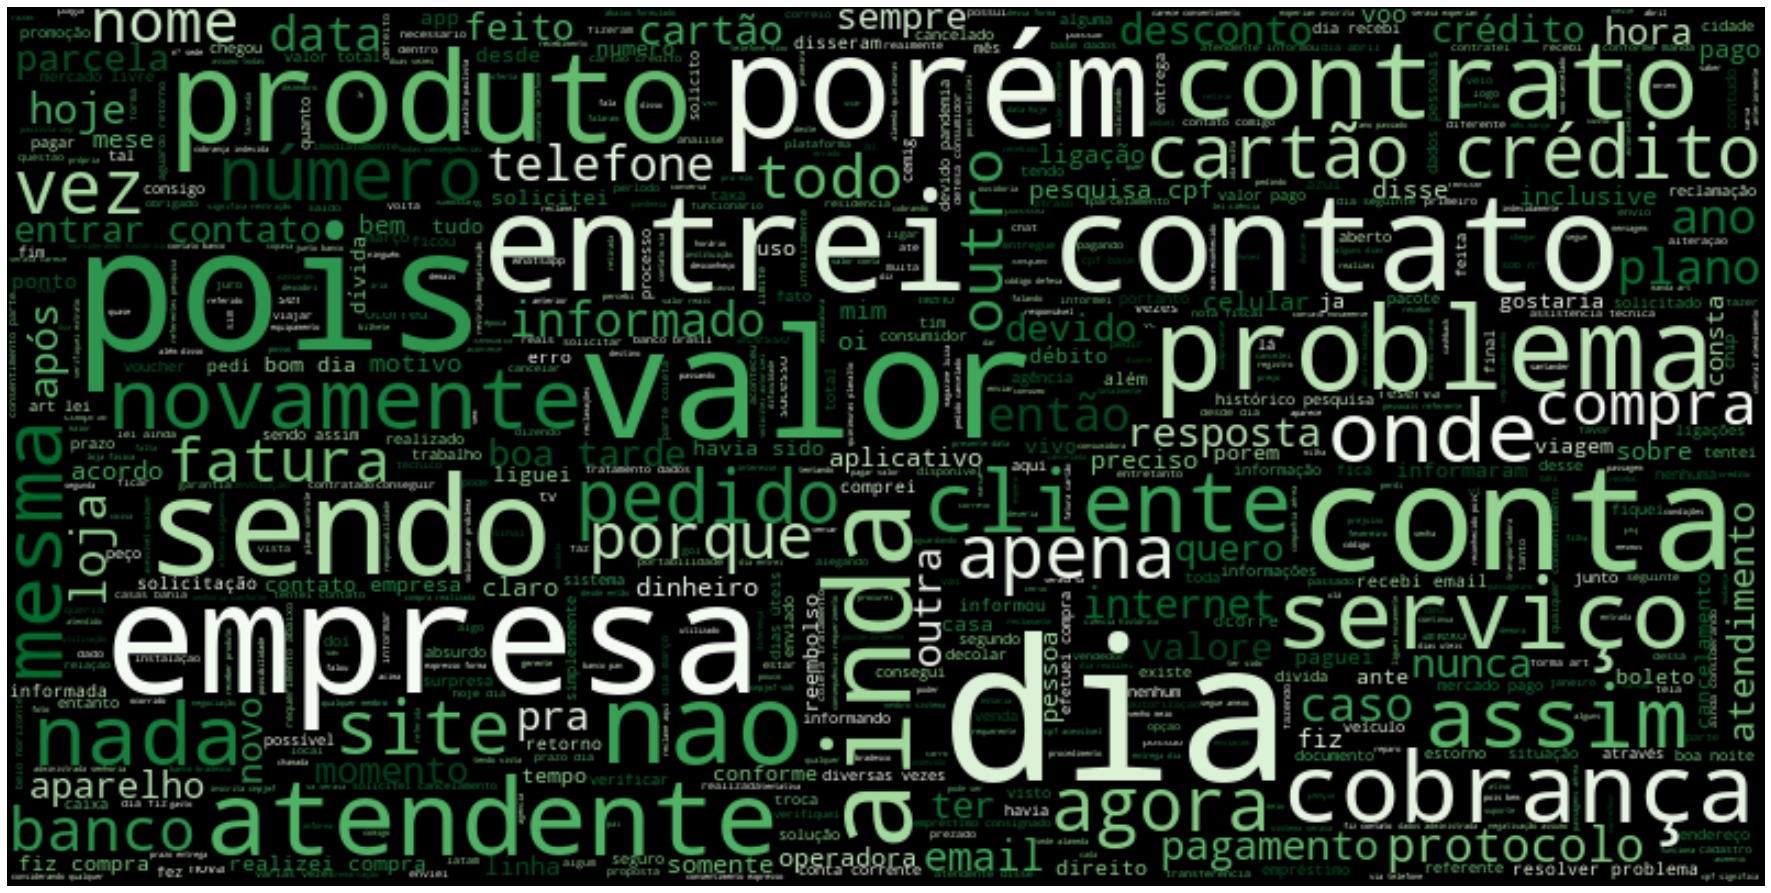

In [77]:
# colormaps: https://matplotlib.org/stable/tutorials/colors/colormaps.html
# colors: https://matplotlib.org/stable/gallery/color/named_colors.html

background_color = 'black'
cmap = 'Greens'
str_tweets=word_cloud(data_relatos_processado, color = background_color, colormap = cmap, size_X = 80, size_Y = 50)

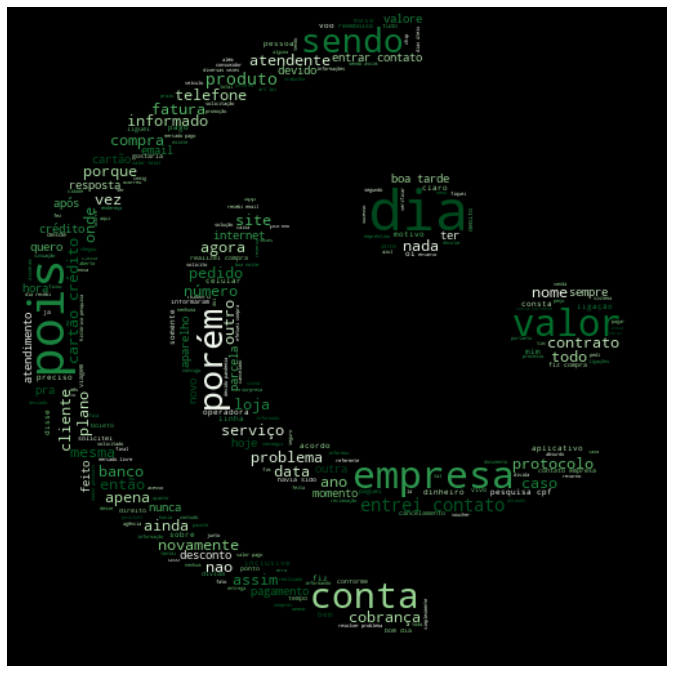

In [78]:
img= 'consumidor-gov-br/logo_consumidor.gov.br.png'
background_color='black'
cmap = 'Greens'
word_cloud_colored(data_relatos_processado, fig_img = img, color = background_color, colormap = cmap, size_X = 30, size_Y = 30)